# Caprini Lellouch Neubert (CLN) parametrization

The CLN parametrization is used to describe the semileptonic decay $B^0 \longrightarrow D^{*-}\ell^+ \nu_{\ell}$ $(\ell = e, \mu)$ and a one-dimensional projection of the differential decay rate into the variables $w$, $cos(\theta_{l})$, $cos(\theta_{\nu})$ and $\chi$ is calculated.


In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [2]:
#CLN Parametrization

# Constants
mDs = 2.01
mB = 5.279
GF = 1.16637 * 10**(-5)
mDs = 2.01
mB = 5.279
#eta_EW = 1.0066
eta_EW = 1.
r = mDs/mB

def z(w):
    """Calculate z based on w."""
    return ((w+1.0)**0.5 - 2.0**0.5) / ((w + 1.0)**0.5 + 2.0**0.5)

def hA1(w,rho2):
    """Calculate hA1 based on w and rho2."""
    #hA1_1 = 0.906
    hA1_1 = 1.0
    return hA1_1*(1.0 - 8.0 * rho2 * z(w) + (53.0 * rho2 - 15.0) * z(w)**2.0 - (231.0 * rho2 - 91.0) * z(w)**3.0)

def R1(w,R1_1):
    """Calculate R1 based on w and R1_1."""
    return R1_1 - 0.12 * (w - 1.0) + 0.05 * (w-1.0)**2.0

def R2(w,R2_1):
    """Calculate R2 based on w and R2_1."""
    return R2_1 + 0.11 * (w - 1.0) - 0.06 * (w - 1.0)**2.0

def H0(w,para):
    """Calculate H0 based on w and para."""
    rho2, R1_1, R2_1, _ = para
    r = mDs / mB
    Rs = 2.0 * np.sqrt(mB * mDs) / (mB + mDs)
    H0 = mB * Rs * (1.0 - r**2.0) * (w + 1.0) / (2.0 * np.sqrt(1.0 - 2.0 * r * w + r**2)) * hA1(w,rho2)
    H0 = H0 * (1.0 + (1.0 - R2(w, R2_1)) * (w - 1.0) / (1 - r))
    return H0

def Hp(w,para):
    """Calculate Hp based on w and para."""
    rho2, R1_1, R2_1, _ = para
    r = mDs / mB
    Rs = 2.0 * np.sqrt(mB * mDs) / (mB + mDs)
    Hp = mB * Rs * (1.0 - r**2.0) * (w + 1.0) / (2.0 * np.sqrt(1.0 - 2.0 * r * w + r**2.0)) * hA1(w,rho2)
    Hp = Hp * np.sqrt(1.0 - 2.0 * r * w + r**2.0)/(1.0 - r) * (1.0 - R1(w,R1_1) * np.sqrt((w - 1.0)/(w + 1.0)))
    return Hp

def Hm(w,para):
    """Calculate Hm based on w and para."""
    rho2, R1_1, R2_1, _ = para
    r = mDs / mB
    Rs = 2 * np.sqrt(mB * mDs) / (mB + mDs)
    Hm = mB * Rs * (1.0 - r**2.0) * (w + 1.0) / (2.0 * np.sqrt(1.0 - 2.0 * r * w + r**2)) * hA1(w,rho2)
    Hm = Hm * np.sqrt(1.0 - 2.0 * r * w + r**2.0)/(1.0 - r) * (1.0 + R1(w,R1_1) * np.sqrt((w - 1.0)/(w + 1.0)))
    return Hm

def l1(x):
    """Term1 (1-cos(theta_l))^2"""
    return (1-x)**2

def Il1(a,b):
    """Integral (1-cos(theta_l))^2"""
    return b-b**2.+b**3./3.-(a-a**2.+a**3./3.)

def l2(x):
    """Term2 (1+cos(theta_l))^2"""
    return (1+x)**2

def Il2(a,b):
    """Integral (1+cos(theta_l))^2"""
    return b+b**2.+b**3./3.-(a+a**2.+a**3./3.)

def l3(x):
    """Term3 1-cos(theta_l)^2"""
    return 1-x**2

def Il3(a,b):
    """Integral 1-cos(theta_l)^2"""
    return b-b**3./3.-(a-a**3./3.)

def l4(x):
    """#Term4 1-cos(theta_l)^2"""
    return 1-x**2

def Il4(a,b):
    """Integral 1-cos(theta_l)^2"""
    return b-b**3./3.-(a-a**3./3.)

def n1(x):
    """Term1 1-cos(theta_nu)^2"""
    return 1-x**2

def In1(a,b):
    """Integral 1-cos(theta_nu)^2"""
    return b-b**3./3.-(a-a**3./3.)

def n2(x):
    """Term2 1-cos(theta_nu)^2"""
    return 1-x**2

def In2(a,b):
    """Integral 1-cos(theta_nu)^2"""
    return b-b**3./3.-(a-a**3./3.)

def n3(x):
    """Term3 cos(theta_nu)^2"""
    return x**2

def In3(a,b):
    """Integral cos(theta_nu)^2"""
    return b**3./3.-(a**3./3.)

def n4(x):
    """Term4 1-cos(theta_nu)^2"""
    return 1-x**2

def In4(a,b):
    """Integral 1-cos(theta_nu)^2"""
    return b-b**3./3.-(a-a**3./3.)

def c1(x):
    """Term1 1"""
    return 1.

def Ic1(a,b):
    """Integral 1"""
    return b-a

def c2(x):
    """Term2 1"""
    return 1.

def Ic2(a,b):
    """Integral 1"""
    return b-a

def c3(x):
    """Term3 1"""
    return 1.

def Ic3(a,b):
    """Integral 1"""
    return b-a

def c4(x):
    """Term4 cos(2*chi)"""
    return np.cos(2.*x)

def Ic4(a,b):
    """Integral cos(2*chi)"""
    return 0.5*np.sin(2.*b)-0.5*np.sin(2.*a)

def w1(w, para):
    """Term1 sqrt(w^2-1)*(1.-2.*w*r+r**2)*Hp^2"""
    mDs = 2.01
    mB = 5.279
    r = mDs/mB
    return np.sqrt(w**2-1.)*(1.-2.*w*r+r**2)*Hp(w,para)**2

def Iw1(a,b,para):
    """Integral sqrt(w^2-1)*(1.-2.*w*r+r**2)*Hp^2"""
    I = quad(w1, a, b, args=(para))
    return I[0]

def w2(w, para):
    """Term2 sqrt(w^2-1)*(1.-2.*w*r+r**2)*Hm^2"""
    mDs = 2.01
    mB = 5.279
    r = mDs/mB
    return np.sqrt(w**2-1.)*(1.-2.*w*r+r**2)*Hm(w,para)**2

def Iw2(a,b,para):
    """Integral sqrt(w^2-1)*(1.-2.*w*r+r**2)*Hm^2"""
    I = quad(w2, a, b, args=(para))
    return I[0]

def w3(w, para):
    """Term3 4*sqrt(w^2-1)*(1.-2.*w*r+r**2)*H0^2"""
    mDs = 2.01
    mB = 5.279
    r = mDs/mB
    return 4.*np.sqrt(w**2-1.)*(1.-2.*w*r+r**2)*H0(w,para)**2

def Iw3(a,b,para):
    """Integral 4*sqrt(w^2-1)*(1.-2.*w*r+r**2)*H0^2"""
    I = quad(w3, a, b, args=(para))
    return I[0]

def w4(w, para):
    """Term4 -2*sqrt(w^2-1)*(1.-2.*w*r+r**2)*Hp*Hm"""
    mDs = 2.01
    mB = 5.279
    r = mDs/mB
    return -2.*np.sqrt(w**2-1.)*(1.-2.*w*r+r**2)*Hp(w,para)*Hm(w,para)

def Iw4(a,b,para):
    """Integral -2*sqrt(w^2-1)*(1.-2.*w*r+r**2)*Hp*Hm"""
    I = quad(w4, a, b, args=(para))
    return I[0]

#Integral from cos(theta_l)=-1 to cos(theta_l)=1
Il = np.zeros(shape=(4))
Il[0] = Il1(-1.,1.) #term 1
Il[1] = Il2(-1.,1.) #term 2
Il[2] = Il3(-1.,1.) #term 3
Il[3] = Il4(-1.,1.) #term 4

#Integral from cos(theta_nu)=-1 to cos(theta_nu)=1
In = np.zeros(shape=(4))
In[0] = In1(-1.,1.) #term 1
In[1] = In2(-1.,1.) #term 2
In[2] = In3(-1.,1.) #term 3
In[3] = In4(-1.,1.) #term 4

#Integral from chi=-Pi to chi=Pi
Ic = np.zeros(shape=(4))
Ic[0] = Ic1(-np.pi,np.pi) #term 1
Ic[1] = Ic2(-np.pi,np.pi) #term 2
Ic[2] = Ic3(-np.pi,np.pi) #term 3
Ic[3] = Ic4(-np.pi,np.pi) #term 4

parameter: [1.166, 1.184, 0.848, 0.03648]


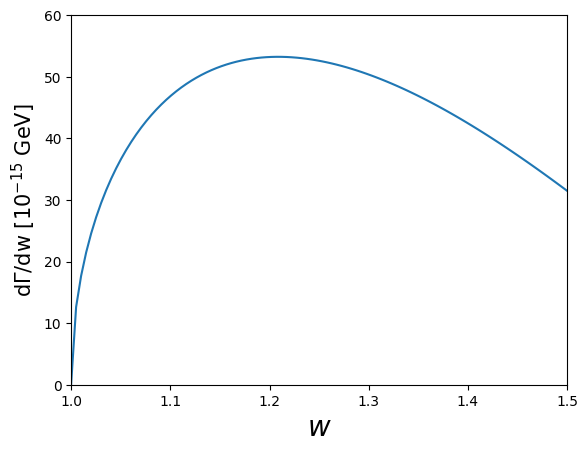

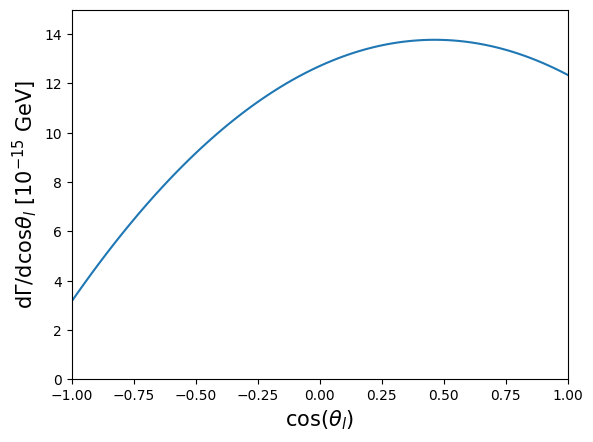

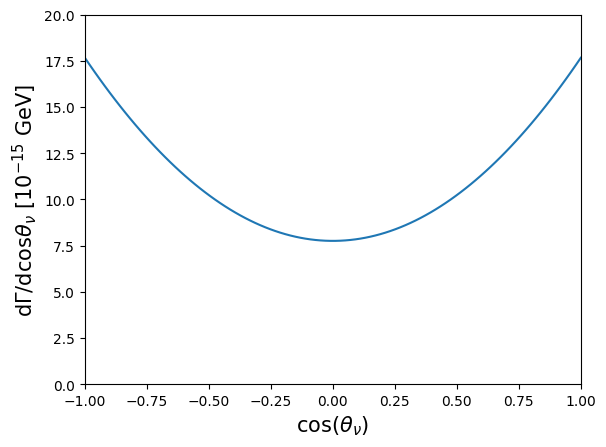

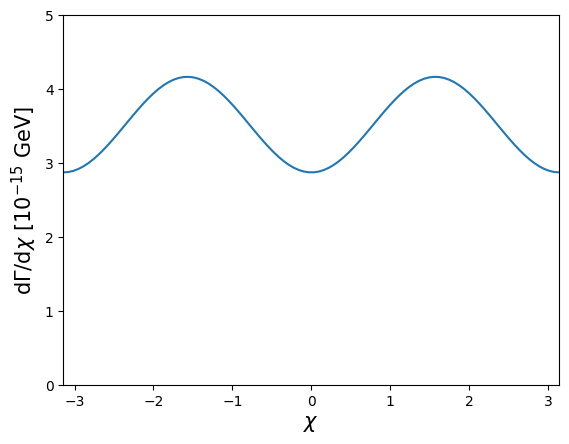

In [3]:
#four parameters: rho**2, R1(1), R2(1), Vcb*eta_EW*F(1)
para = [1.166, 1.184, 0.848, 0.03648]
rho2, R1_1, R2_1, Vcb_etaEW_F1 = para

#Integral from w=1. to w=1.5
Iw = np.zeros(shape=(4))
Iw[0] = Iw1(1.,1.5,para) #term 1
Iw[1] = Iw2(1.,1.5,para) #term 2
Iw[2] = Iw3(1.,1.5,para) #term 3
Iw[3] = Iw4(1.,1.5,para) #term 4

Amp = 3 * mB * mDs**2 / (4 * (4 * np.pi)**4) * GF**2 * Vcb_etaEW_F1**2 * 10**15

def W(x,para):
    rho2, R1_1, R2_1, Vcb_etaEW_F1 = para
    W =     w1(x,para) * Il[0] * In[0] * Ic[0]
    W = W + w2(x,para) * Il[1] * In[1] * Ic[1]
    W = W + w3(x,para) * Il[2] * In[2] * Ic[2]
    W = W + w4(x,para) * Il[3] * In[3] * Ic[3]
    W = W * Amp
    return W

def Cos_l(x):
    Cos_l =         Iw[0] * l1(x) * In[0] * Ic[0]
    Cos_l = Cos_l + Iw[1] * l2(x) * In[1] * Ic[1]
    Cos_l = Cos_l + Iw[2] * l3(x) * In[2] * Ic[2]
    Cos_l = Cos_l + Iw[3] * l4(x) * In[3] * Ic[3]
    Cos_l = Cos_l * Amp
    return Cos_l

def Cos_nu(x):
    Cos_nu =          Iw[0] * Il[0] * n1(x) * Ic[0]
    Cos_nu = Cos_nu + Iw[1] * Il[1] * n2(x) * Ic[1]
    Cos_nu = Cos_nu + Iw[2] * Il[2] * n3(x) * Ic[2]
    Cos_nu = Cos_nu + Iw[3] * Il[3] * n4(x) * Ic[3]
    Cos_nu = Cos_nu * Amp
    return Cos_nu

def Chi(x):
    Chi =       Iw[0] * Il[0] * In[0] * c1(x)
    Chi = Chi + Iw[1] * Il[1] * In[1] * c2(x)
    Chi = Chi + Iw[2] * Il[2] * In[2] * c3(x)
    Chi = Chi + Iw[3] * Il[3] * In[3] * c4(x)
    Chi = Chi * Amp
    return Chi

print("parameter:",para)

x_w=np.linspace(1., 1.5, 100)
plt.plot(x_w, W(x_w,para))
plt.ylim(0., 60)
plt.xlim(1., 1.5)
plt.xlabel(r'$w$', fontsize=20)
plt.ylabel(r'd$\Gamma$/dw [10$^{-15}$ GeV]', fontsize=15)
plt.show()

x_l=np.linspace(-1., 1., 100)
plt.plot(x_l, Cos_l(x_l))
plt.ylim(0., 15)
plt.xlim(-1., 1.)
plt.xlabel(r'cos($\theta_l$)', fontsize=15)
plt.ylabel(r'd$\Gamma$/dcos$\theta_l$ [10$^{-15}$ GeV]', fontsize=15)
plt.show()

x_nu=np.linspace(-1., 1., 100)
plt.plot(x_nu, Cos_nu(x_nu))
plt.ylim(0., 20)
plt.xlim(-1., 1.)
plt.xlabel(r'cos($\theta_{\nu}$)', fontsize=15)
plt.ylabel(r'd$\Gamma$/dcos$\theta_{\nu}$ [10$^{-15}$ GeV]', fontsize=15)
plt.show()

x_c=np.linspace(-np.pi,np.pi, 100)
plt.plot(x_c, Chi(x_c))
plt.ylim(0., 5.)
plt.xlim(-np.pi, np.pi)
plt.xlabel(r'$\chi$', fontsize=15)
plt.ylabel(r'd$\Gamma$/d$\chi$ [10$^{-15}$ GeV]', fontsize=15)
plt.show()